<a href="https://colab.research.google.com/github/Jaideep-Kulkarni/Prediction-and-Classification/blob/main/Random_Forest_Explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv('jordan.csv')
features.head(5)

,Name,Active status,Primary position,Primary position.1,Splits season,Games played,Ground outs,Air outs,Runs,Doubles,Triples,Home runs,Strike outs,Base-on-balls,Intentional walks,Hits,Hit-by-pitch,AVG,Atbats,OBP,SLG,OPS,Caught stealing,Stolen bases,Stolen base percentage,Ground into double play,Ground into triple play,Plate appearances,Total bases,RBI,Left on base,Sacbunts,Sacflies,Ground outs to airouts,Catchers interference,AtBats per home run,Team name,Opponent name,Position Played,DATE
0,Jordan McArdle,True,Outfield,hitting,2016,1,0,0,0,0,0,0,1,1,0,0,0,0.000,1,0.500,0.000,0.500,0,0,.---,0,0,2,0,0,2,0,0,-.--,0,-.--,Adelaide Bite,Sydney Blue Sox,Pinch Hitter,18/11/2016
1,Jordan McArdle,True,Outfield,hitting,2016,1,0,1,0,0,0,0,0,0,0,0,0,0.000,1,0.333,0.000,0.333,0,0,.---,0,0,1,0,0,0,0,0,0,0,-.--,Adelaide Bite,Melbourne Aces,Pinch Hitter,25/11/2016
2,Jordan McArdle,True,Outfield,hitting,2016,1,1,0,1,0,0,0,0,0,0,0,0,0.000,1,0.250,0.000,0.250,0,0,.---,0,0,1,0,0,1,0,0,*.**,0,-.--,Adelaide Bite,Melbourne Aces,Pinch Hitter,26/11/2016
3,Jordan McArdle,True,Outfield,hitting,2016,1,0,1,0,0,0,0,2,0,0,1,0,0.143,4,0.250,0.143,0.393,0,0,.---,0,0,4,1,0,0,0,0,0.25,0,-.--,Adelaide Bite,Brisbane Bandits,Designated Hitter,16/12/2016
4,Jordan McArdle,True,Outfield,hitting,2016,1,0,0,1,1,0,0,0,1,0,2,0,0.333,2,0.455,0.444,0.899,0,0,.---,0,0,3,3,0,0,0,0,*.**,0,-.--,Adelaide Bite,Brisbane Bandits,Designated Hitter,17/12/2016


In [2]:
print('The shape of our data is:', features.shape)

The shape of our data is: (149, 40)


In [3]:
features.replace(".---",0)
features.replace("*.**",0)

,Name,Active status,Primary position,Primary position.1,Splits season,Games played,Ground outs,Air outs,Runs,Doubles,Triples,Home runs,Strike outs,Base-on-balls,Intentional walks,Hits,Hit-by-pitch,AVG,Atbats,OBP,SLG,OPS,Caught stealing,Stolen bases,Stolen base percentage,Ground into double play,Ground into triple play,Plate appearances,Total bases,RBI,Left on base,Sacbunts,Sacflies,Ground outs to airouts,Catchers interference,AtBats per home run,Team name,Opponent name,Position Played,DATE
0,Jordan McArdle,True,Outfield,hitting,2016,1,0,0,0,0,0,0,1,1,0,0,0,0.000,1,0.500,0.000,0.500,0,0,.---,0,0,2,0,0,2,0,0,-.--,0,-.--,Adelaide Bite,Sydney Blue Sox,Pinch Hitter,18/11/2016
1,Jordan McArdle,True,Outfield,hitting,2016,1,0,1,0,0,0,0,0,0,0,0,0,0.000,1,0.333,0.000,0.333,0,0,.---,0,0,1,0,0,0,0,0,0,0,-.--,Adelaide Bite,Melbourne Aces,Pinch Hitter,25/11/2016
2,Jordan McArdle,True,Outfield,hitting,2016,1,1,0,1,0,0,0,0,0,0,0,0,0.000,1,0.250,0.000,0.250,0,0,.---,0,0,1,0,0,1,0,0,0,0,-.--,Adelaide Bite,Melbourne Aces,Pinch Hitter,26/11/2016
3,Jordan McArdle,True,Outfield,hitting,2016,1,0,1,0,0,0,0,2,0,0,1,0,0.143,4,0.250,0.143,0.393,0,0,.---,0,0,4,1,0,0,0,0,0.25,0,-.--,Adelaide Bite,Brisbane Bandits,Designated Hitter,16/12/2016
4,Jordan McArdle,True,Outfield,hitting,2016,1,0,0,1,1,0,0,0,1,0,2,0,0.333,2,0.455,0.444,0.899,0,0,.---,0,0,3,3,0,0,0,0,0,0,-.--,Adelaide Bite,Brisbane Bandits,Designated Hitter,17/12/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Jordan McArdle,True,Outfield,hitting,2020,1,0,1,0,0,0,0,2,0,0,1,0,0.179,4,0.304,0.231,0.535,0,0,.---,0,0,4,1,0,3,0,0,0.56,0,-.--,Adelaide Giants,Perth Heat,Outfielder,25/01/2021
145,Jordan McArdle,True,Outfield,hitting,2020,1,1,0,1,1,0,0,1,0,0,2,0,0.209,4,0.320,0.279,0.599,0,0,.---,0,0,4,3,1,0,0,0,0,0,-.--,Adelaide Giants,Perth Heat,Outfielder,28/01/2021
146,Jordan McArdle,True,Outfield,hitting,2020,1,0,0,3,0,0,0,0,0,0,4,0,0.277,4,0.370,0.340,0.711,0,0,.---,0,0,4,4,0,0,0,0,0,0,-.--,Adelaide Giants,Perth Heat,Outfielder,29/01/2021
147,Jordan McArdle,True,Outfield,hitting,2020,1,2,1,0,0,0,0,0,0,0,0,0,0.260,3,0.351,0.320,0.671,0,0,.---,0,0,3,0,0,1,0,0,0.63,0,-.--,Adelaide Giants,Perth Heat,Outfielder,30/01/2021


In [4]:
features = features[features.OPS != 0]

In [5]:
features['Number'] = range(1, len(features) + 1)

## One-Hot Encoding

In [6]:
features.dtypes

Name                        object
Active status                 bool
Primary position            object
Primary position.1          object
Splits season                int64
Games played                 int64
Ground outs                  int64
Air outs                     int64
Runs                         int64
Doubles                      int64
Triples                      int64
Home runs                    int64
Strike outs                  int64
Base-on-balls                int64
Intentional walks            int64
Hits                         int64
Hit-by-pitch                 int64
AVG                        float64
Atbats                       int64
OBP                        float64
SLG                        float64
OPS                        float64
Caught stealing              int64
Stolen bases                 int64
Stolen base percentage      object
Ground into double play      int64
Ground into triple play      int64
Plate appearances            int64
Total bases         

In [7]:
features= features.drop(['Stolen base percentage','AtBats per home run','Ground outs to airouts'], axis = 1)

In [8]:
features.dtypes

Name                        object
Active status                 bool
Primary position            object
Primary position.1          object
Splits season                int64
Games played                 int64
Ground outs                  int64
Air outs                     int64
Runs                         int64
Doubles                      int64
Triples                      int64
Home runs                    int64
Strike outs                  int64
Base-on-balls                int64
Intentional walks            int64
Hits                         int64
Hit-by-pitch                 int64
AVG                        float64
Atbats                       int64
OBP                        float64
SLG                        float64
OPS                        float64
Caught stealing              int64
Stolen bases                 int64
Ground into double play      int64
Ground into triple play      int64
Plate appearances            int64
Total bases                  int64
RBI                 

In [9]:
cols = ['AVG','SLG','OBP']
features[cols] = features[cols].apply(pd.to_numeric,axis=1)

In [10]:
features.dtypes

Name                        object
Active status                 bool
Primary position            object
Primary position.1          object
Splits season                int64
Games played                 int64
Ground outs                  int64
Air outs                     int64
Runs                         int64
Doubles                      int64
Triples                      int64
Home runs                    int64
Strike outs                  int64
Base-on-balls                int64
Intentional walks            int64
Hits                         int64
Hit-by-pitch                 int64
AVG                        float64
Atbats                       int64
OBP                        float64
SLG                        float64
OPS                        float64
Caught stealing              int64
Stolen bases                 int64
Ground into double play      int64
Ground into triple play      int64
Plate appearances            int64
Total bases                  int64
RBI                 

In [11]:
df = features

In [12]:
# One-hot encode categorical features
features = pd.get_dummies(features)
features.head(5)

,Active status,Splits season,Games played,Ground outs,Air outs,Runs,Doubles,Triples,Home runs,Strike outs,Base-on-balls,Intentional walks,Hits,Hit-by-pitch,AVG,Atbats,OBP,SLG,OPS,Caught stealing,Stolen bases,Ground into double play,Ground into triple play,Plate appearances,Total bases,RBI,Left on base,Sacbunts,Sacflies,Catchers interference,Number,Name_Jordan McArdle,Primary position_Outfield,Primary position.1_hitting,Team name_Adelaide Bite,Team name_Adelaide Giants,Opponent name_Auckland Tuatara,Opponent name_Brisbane Bandits,Opponent name_Canberra Cavalry,Opponent name_Geelong-Korea,...,DATE_28/12/2018,DATE_28/12/2019,DATE_29/01/2017,DATE_29/01/2021,DATE_29/11/2018,DATE_29/11/2019,DATE_29/12/2016,DATE_29/12/2017,DATE_29/12/2018,DATE_29/12/2019,DATE_3/01/2019,DATE_30/01/2021,DATE_30/11/2017,DATE_30/11/2018,DATE_30/12/2016,DATE_30/12/2017,DATE_30/12/2018,DATE_31/12/2016,DATE_31/12/2017,DATE_31/12/2018,DATE_4/01/2018,DATE_5/01/2018,DATE_5/01/2019,DATE_5/01/2021,DATE_5/12/2019,DATE_6/01/2017,DATE_6/01/2018,DATE_6/01/2019,DATE_6/01/2021,DATE_6/12/2018,DATE_6/12/2019,DATE_7/01/2017,DATE_7/01/2018,DATE_7/01/2021,DATE_7/12/2018,DATE_7/12/2019,DATE_8/01/2017,DATE_8/12/2017,DATE_8/12/2018,DATE_9/12/2017
0,True,2016,1,0,0,0,0,0,0,1,1,0,0,0,0.000,1,0.500,0.000,0.500,0,0,0,0,2,0,0,2,0,0,0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,True,2016,1,0,1,0,0,0,0,0,0,0,0,0,0.000,1,0.333,0.000,0.333,0,0,0,0,1,0,0,0,0,0,0,2,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,True,2016,1,1,0,1,0,0,0,0,0,0,0,0,0.000,1,0.250,0.000,0.250,0,0,0,0,1,0,0,1,0,0,0,3,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,True,2016,1,0,1,0,0,0,0,2,0,0,1,0,0.143,4,0.250,0.143,0.393,0,0,0,0,4,1,0,0,0,0,0,4,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,True,2016,1,0,0,1,1,0,0,0,1,0,2,0,0.333,2,0.455,0.444,0.899,0,0,0,0,3,3,0,0,0,0,0,5,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
print('Shape of data after one-hot encoding:', features.shape)

Shape of data after one-hot encoding: (147, 174)


## Features and Labels

In [14]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['OPS'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('OPS', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

## Training and Testing Sets

In [15]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30,
                                                                           random_state = 42)

In [16]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (102, 173)
Training Labels Shape: (102,)
Testing Features Shape: (45, 173)
Testing Labels Shape: (45,)


## Training the Forest

In [17]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

We can create models with different hyperparameters to try and boost performance. The only way to find the best ones
are to try a few and evaluate them! 

In [18]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

## Make Predictions on Test Data

In [19]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [20]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.03 degrees.
Accuracy: 91.69 %.


## Visualizing a Single Decision Tree

In [21]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 

![Decision Tree](tree.png)

In [22]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 12


Smaller tree for visualization.

In [23]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png')

![Small Decision Tree](small_tree.PNG)

## Variable Importances

In [24]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: SLG                  Importance: 0.86
Variable: AVG                  Importance: 0.08
Variable: OBP                  Importance: 0.05
Variable: Active status        Importance: 0.0
Variable: Splits season        Importance: 0.0
Variable: Games played         Importance: 0.0
Variable: Ground outs          Importance: 0.0
Variable: Air outs             Importance: 0.0
Variable: Runs                 Importance: 0.0
Variable: Doubles              Importance: 0.0
Variable: Triples              Importance: 0.0
Variable: Home runs            Importance: 0.0
Variable: Strike outs          Importance: 0.0
Variable: Base-on-balls        Importance: 0.0
Variable: Intentional walks    Importance: 0.0
Variable: Hits                 Importance: 0.0
Variable: Hit-by-pitch         Importance: 0.0
Variable: Atbats               Importance: 0.0
Variable: Caught stealing      Importance: 0.0
Variable: Stolen bases         Importance: 0.0
Variable: Ground into double play Importance: 0.0
Variabl

### Two Most Important Features

In [25]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('SLG'), feature_list.index('OBP'), feature_list.index('AVG')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.02 degrees.
Accuracy: 93.17 %.


In [26]:
test_labels

array([0.942, 0.718, 0.633, 0.97 , 0.915, 0.925, 0.409, 0.458, 0.4  ,
       0.97 , 0.823, 0.549, 0.599, 0.452, 0.449, 0.282, 1.004, 0.384,
       0.924, 0.439, 0.516, 0.907, 0.681, 0.988, 0.652, 0.813, 0.5  ,
       0.41 , 0.433, 0.813, 0.523, 0.636, 0.945, 0.1  , 0.899, 1.167,
       0.476, 0.671, 0.644, 0.907, 0.906, 1.108, 0.448, 0.593, 0.652])

## Visualizations

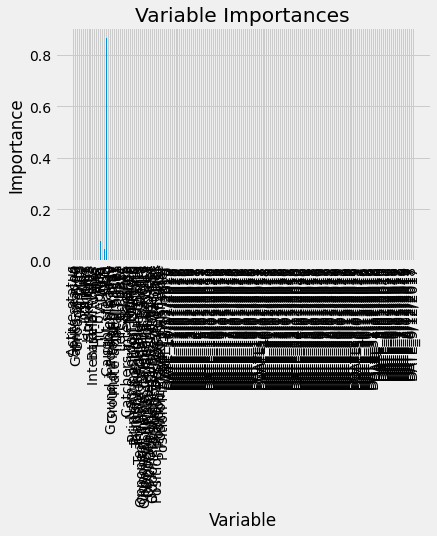

In [27]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [28]:
import datetime

# Dates of training values
#months = features[:, feature_list.index('month')]
#days = features[:, feature_list.index('day')]
#years = features[:, feature_list.index('year')]

# List and then convert to datetime object
#dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
#dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
Number = features[:,feature_list.index('Number')]
true_data = pd.DataFrame(data = {'Number': Number, 'actual': labels})

# Dates of predictions
months = test_features[:, feature_list.index('Number')]
#days = test_features[:, feature_list.index('day')]
#years = test_features[:, feature_list.index('year')]

# Column of dates
#test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
#test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'Number': months, 'prediction': predictions}) 

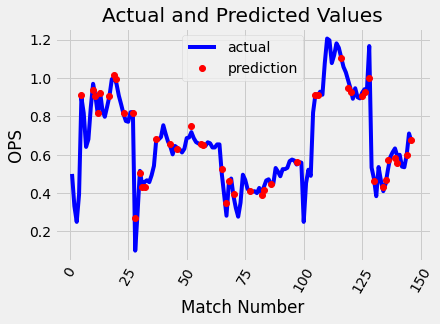

In [29]:
# Plot the actual values
plt.plot(true_data['Number'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['Number'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Match Number'); plt.ylabel('OPS'); plt.title('Actual and Predicted Values');
